In [1]:
%%time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

CPU times: total: 1.78 s
Wall time: 3.62 s


In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.CIFAR10(r"C:\Users\akhil\Downloads\Data",train=True,download=True,transform=transform)

Files already downloaded and verified


In [4]:
test_data = datasets.CIFAR10(r"C:\Users\akhil\Downloads\Data",train=False,download=True,transform=transform)

Files already downloaded and verified


In [5]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: C:\Users\akhil\Downloads\Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: C:\Users\akhil\Downloads\Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
torch.manual_seed(101)
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [8]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

In [9]:
for images,labels in train_loader:
    break

label: [1 5 8 1 6 1 6 3 7 9]
Class:    car   dog  ship   car  frog   car  frog   cat horse truck


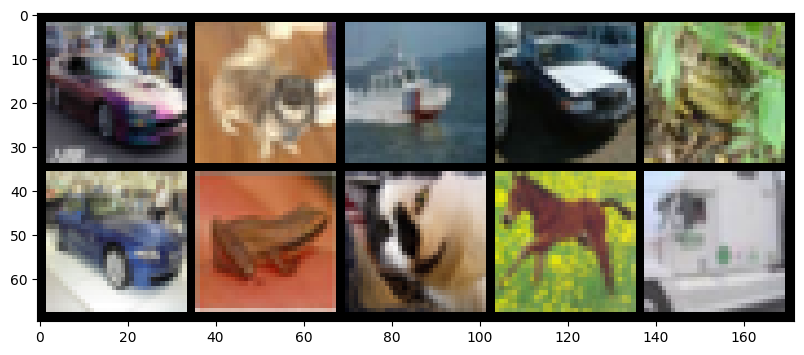

In [10]:
print('label:',labels.numpy())
print('Class: ',*np.array([class_names[i] for i in labels]))

im = make_grid(images,nrow=5)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [11]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)  # changed from (1, 6, 5, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(6*6*16, 120)   # changed from (4*4*16) to fit 32x32 images with 3x3 filters
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 6*6*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [23]:
class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1)
        self.fc1 = nn.Linear(in_features=5*6*16,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=84)
        self.fc3 = nn.Linear(in_features=84,out_features=10)
        
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 6*6*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [12]:
model = ConvolutionalNetwork()
model
torch.manual_seed(42)
PATH = "model1.pt"

# Save
torch.save(model.state_dict(), PATH)

# Load
device = torch.device('cuda')
model = ConvolutionalNetwork()
model.load_state_dict(torch.load(PATH))
model.to(device)
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [13]:
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [14]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[-0.1100, -0.0743,  0.1651],
          [ 0.0502, -0.1863, -0.0896],
          [ 0.1580, -0.1446, -0.1035]],

         [[ 0.1396,  0.0336,  0.0901],
          [ 0.1467,  0.0475,  0.1275],
          [ 0.1266,  0.1023, -0.1674]],

         [[ 0.1553, -0.1665,  0.0104],
          [-0.1522,  0.0676,  0.0475],
          [-0.0691, -0.0380,  0.0079]]],


        [[[-0.0334, -0.0486, -0.1507],
          [-0.1549,  0.1862, -0.1533],
          [ 0.0419, -0.0082, -0.1584]],

         [[-0.0350, -0.1891, -0.0262],
          [ 0.0126,  0.0448, -0.0229],
          [-0.0078, -0.0808, -0.1899]],

         [[ 0.1739,  0.1289,  0.0014],
          [ 0.1863,  0.1597,  0.0324],
          [ 0.1577,  0.0754,  0.0830]]],


        [[[ 0.1239,  0.0082, -0.1130],
          [ 0.0613,  0.0008, -0.1399],
          [-0.0378, -0.1559, -0.0437]],

         [[ 0.1402,  0.0979,  0.0275],
          [-0.0405, -0.0737, -0.1710],
          [ 0.1528,  0.1471,  0.0263]],

         [[-0.1564,  0

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [16]:
import time 
start_time = time.time()

epochs = 5
train_losses = list()
test_losses = list()

train_correct = list()
test_correct = list()

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    for b,(X_train,y_train) in enumerate(train_loader):
        b+=1
        
        y_pred = model(X_train.to(device))
        loss = criterion(y_pred.to(device),y_train.to(device))
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted.to(device)==y_train.to(device)).sum()
        trn_corr +=batch_corr 
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%600 == 0:
            print(f"Epoch: {i} Batch: {b} Loss: {loss.item()}")
    train_losses.append(loss.item())
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        for b,(X_test,y_test) in enumerate(test_loader):
            y_val = model(X_test.to(device))
            predicted = torch.max(y_val.data,1)[1]
            tst_corr+=(predicted.to(device)==y_test.to(device)).sum()
            
    loss = criterion(y_val.to(device),y_test.to(device))
    test_losses.append(loss.item())
    test_correct.append(tst_corr)
        
        
        
current_time = time.time()
total = current_time - start_time

print(f"Training time : {total/60} Minutes")

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same